# Task 3: Heart Disease Prediction

# Objective:
Predict whether a person is at risk of heart disease using health data from the Heart Disease UCI Dataset.

# Cell 1: Importing Required Libraries

In this step, you import all the essential libraries needed for data analysis, visualization, and machine learning:

pandas → For loading and handling the dataset

numpy → For numerical operations

matplotlib & seaborn → For plotting graphs and performing EDA

sklearn.model_selection → For splitting the dataset into train/test

sklearn.preprocessing → For scaling the feature values

sklearn.linear_model → Logistic Regression model

sklearn.metrics → For evaluating model accuracy, ROC curve, confusion matrix, etc.

This cell sets up everything required for the heart disease prediction task.

In [74]:
# Import libraries for data analysis
import pandas as pd        # For data handling
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns      # For better visualizations

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


# Cell 2: Loading and Displaying the Dataset

Loads the heart.csv dataset from your computer.

Cleans column names (removes unwanted spaces).

Displays the first 5 rows of the dataset using df.head().

Outcome Comes from:

 The output shown by df.head() comes directly from your heart.csv file located in your working folder.
    
 Python does not create the data — it only reads and displays whatever is already inside the file.

Outcome:

A table showing the first 5 patient records with columns such as:
age

sex

cp (chest pain type)

trestbps (resting blood pressure)

chol (cholesterol)

fbs

restecg

thalach

exang

oldpeak

num


In [75]:
# Load the dataset 
df = pd.read_csv('heart.csv') # Clean column names by removing spaces at start/end 
df.columns = df.columns.str.strip() # Look at first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,typical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


# Cell 3: Dataset Info and Missing Values Check
  # 1. df.info()

Shows the structure of the dataset

Displays:

Number of rows and columns

Column names

Data types (int, float, object)

How many non-null values each column contains.

# Outcome df.info()

The dataset has 918 rows and 11 columns.

Columns have different data types:

int64 → integers (age, num)

float64 → decimal numbers (trestbps, chol, thalch, oldpeak)

bool → True/False values (fbs, exang)

object → categorical/string values (sex, cp, restecg)

All columns have 918 non-null values, so there are no missing values.

The dataset uses about 66.5 KB of memory.
 
  # 2. df.isnull().sum()

Checks each column for missing (NaN) values

Prints the count of missing values per column

# Outcome  df.isnull().sum()

Each column shows 0 missing values(The dataset is clean and complete, ready for data preprocessing, exploration, and model training).

In [76]:
# Check dataset info
df.info()

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    bool   
 6   restecg   918 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    bool   
 9   oldpeak   918 non-null    float64
 10  num       918 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 66.5+ KB
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


# Cell 4: Preparing the Target Column

1.Automatically detects the last column of the dataset as the target variable (num or similar).

2.Converts the target into binary classification:

0 → No heart disease

1 → Heart disease (any non-zero value)

3.Checks the distribution of classes using value_counts().


In [77]:
# Assume last column is target
target_col = df.columns[-1]
print(f"Target column detected: {target_col}")

# Convert to binary
df[target_col] = df[target_col].apply(lambda x: 0 if x == 0 else 1)

# Check distribution
print(df[target_col].value_counts())


Target column detected: num
num
1    508
0    410
Name: count, dtype: int64


# Cell 5: Visualizing Target Distribution

Uses Seaborn to create a count plot of the target column (num).

Shows the number of patients with and without heart disease.

Helps to visually inspect class balance before training.

Outcome: 

{A bar chart with two bars:

0 (No Disease): 410 patients

1 (Disease): 508 patients

Title: "Target Distribution: 0 = No Disease, 1 = Disease"}

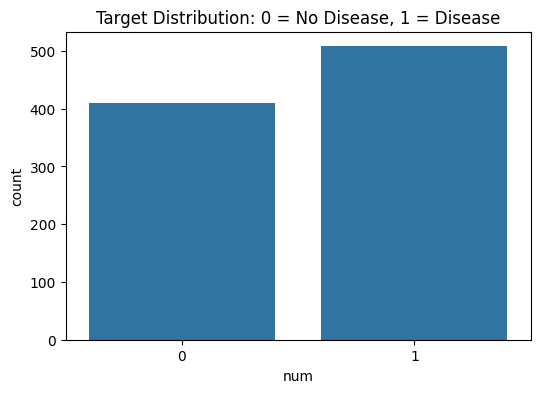

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Distribution: 0 = No Disease, 1 = Disease")
plt.show()


# Cell 6: Encoding Categorical Features

Converts categorical columns (sex, cp, restecg, etc.) into numeric values using one-hot encoding.

drop_first=True avoids multicollinearity by dropping the first category of each feature.

Stores the result in a new DataFrame df_encoded.

Displays the first 5 rows after encoding to check changes.

Outcome: A table showing the first 5 rows with all features numeric,

In [79]:
# Convert categorical columns into numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Check first 5 rows after encoding
df_encoded.head()


,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,True,150.0,False,2.3,0,True,False,True,False,False
1,67,160.0,286.0,False,108.0,True,1.5,1,True,False,False,False,False
2,67,120.0,229.0,False,129.0,True,2.6,1,True,False,False,False,False
3,37,130.0,250.0,False,187.0,False,3.5,0,True,True,False,True,False
4,41,130.0,204.0,False,172.0,False,1.4,0,False,False,True,False,False


# Cell 7: Correlation Heatmap

Computes the correlation matrix of all numeric features in df_encoded.

Uses Seaborn heatmap to visualize correlations between features and the target.

annot=True shows the correlation values on the heatmap, cmap='coolwarm' colors high positive correlations in red and negative correlations in blue.

Outcome:

A heatmap showing correlation values from -1 to 1.

Strong correlations with the target (num) can be easily spotted.

Features with high positive or negative correlation are important for prediction.

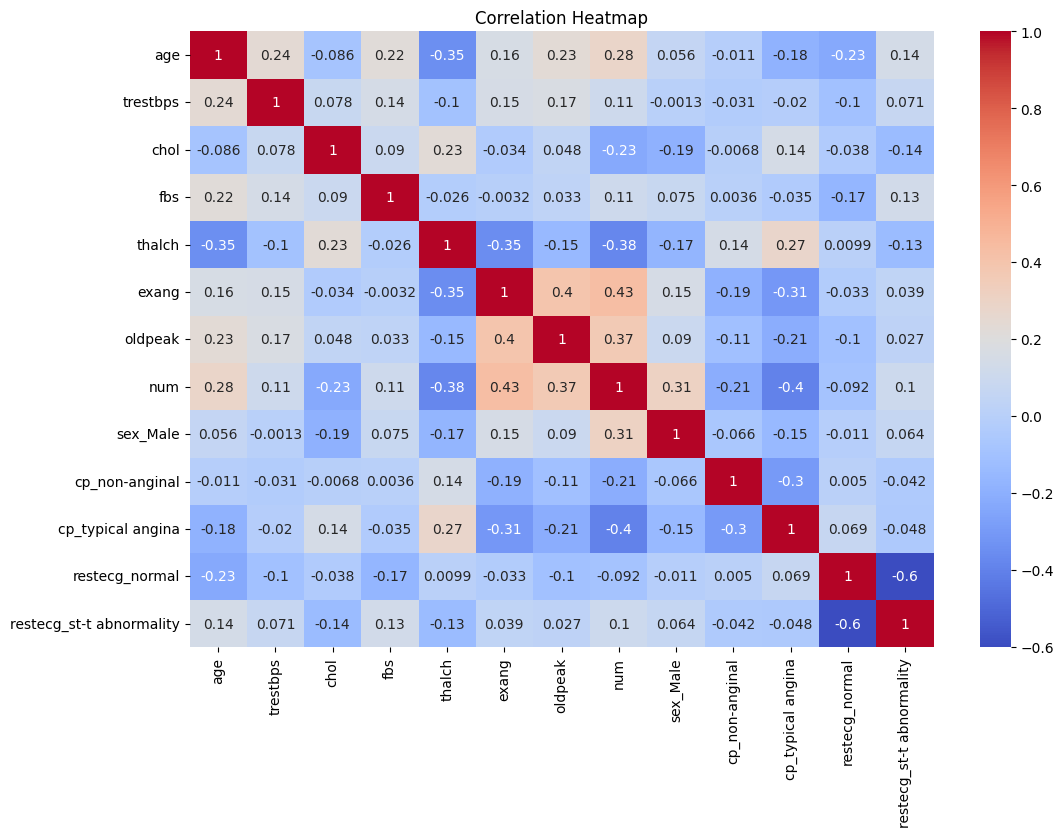

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Cell 8: Defining Features and Target

Sets features (X) as all columns except the target (num).

Sets target (y) as the target column (num).

Prints the shape of features and target to confirm correct separation.

In [81]:
# Features
X = df_encoded.drop(target_col, axis=1)

# Target
y = df_encoded[target_col]

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (918, 12)
Target shape: (918,)


# Cell 9: Feature Scaling and Train-Test Split

1.Standardizes features using StandardScaler:

  Centers features to mean = 0

  Scales to standard deviation = 1

2. Ensures all features contribute equally to the model.

3. Splits the data into training (80%) and testing (20%) sets using train_test_split.

4. Prints the shape of training and testing datasets.

Outcome:

734 samples are used for training, 184 samples for testing.

Each sample has 12 features (after encoding and any preprocessing).

Data is standardized, so all features have similar scale.

The dataset is now ready for model training (e.g., Logistic Regression, Decision Tree).

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (734, 12)
Testing data shape: (184, 12)


# Cell 10: Training the Logistic Regression Model
Creates a Logistic Regression model with a maximum of 1000 iterations to ensure convergence.

Trains the model on the training set (X_train, y_train
                                     
Outcome Tells us how the model is configured.

In [83]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Cell 11: Making Predictions
y_pred = model.predict(X_test)

Predicts the class labels (0 = no disease, 1 = disease) for the test set.

y_pred_prob = model.predict_proba(X_test)[:,1]

Predicts the probability of heart disease for each test sample (used for ROC curve and thresholding).

In [84]:
# Predict classes
y_pred = model.predict(X_test)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]


# Cell 12: Model Evaluation – Accuracy & Confusion Matrix

Accuracy:

accuracy_score(y_test, y_pred) computes the proportion of correctly predicted samples.

Confusion Matrix:

confusion_matrix(y_test, y_pred) shows counts of:

True Positives (TP)

True Negatives (TN)

False Positives (FP)

False Negatives (FN)

Heatmap visualizes this matrix for easier interpretation.

Accuracy: 0.80


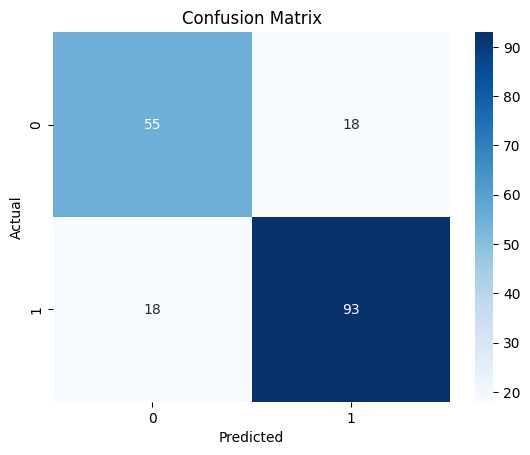

In [85]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()


# Cell 13: ROC Curve and AUC

1. roc_curve(y_test, y_pred_prob) computes:

FPR (False Positive Rate)

TPR (True Positive Rate / Recall)

Thresholds for classification

2. roc_auc_score(y_test, y_pred_prob) calculates the Area Under the Curve (AUC).

3. Plots the ROC curve:

Diagonal dashed line → random classifier

Curve above diagonal → better than random

AUC shows model’s overall discriminative ability.

Outcome:

ROC curve plot with TPR vs FPR

AUC: 0.87

Curve above diagonal line indicates good model performance.

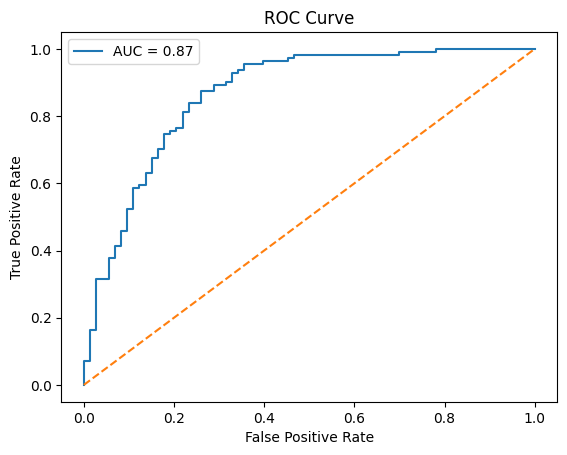

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()


# Cell 14: Classification Report

Generates a detailed performance report for the model using classification_report:

Precision → proportion of positive predictions that are correct

Recall (Sensitivity) → proportion of actual positives correctly identified

F1-score → harmonic mean of precision and recall

Support → number of samples in each class

In [87]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        73
           1       0.84      0.84      0.84       111

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



# Cell 15: Feature Importance

Extracts the coefficients from the trained Logistic Regression model:

Each coefficient represents the impact of a feature on predicting heart disease.

Creates a pandas Series with feature names and sorts them by importance.

Plots a bar chart to visualize which features are most influential.

Feature Importance:
 oldpeak                     0.631288
sex_Male                    0.520992
exang                       0.482736
age                         0.299561
fbs                         0.229424
trestbps                    0.133101
restecg_normal              0.013283
restecg_st-t abnormality   -0.062823
thalch                     -0.351390
chol                       -0.474059
cp_non-anginal             -0.614312
cp_typical angina          -0.810264
dtype: float64


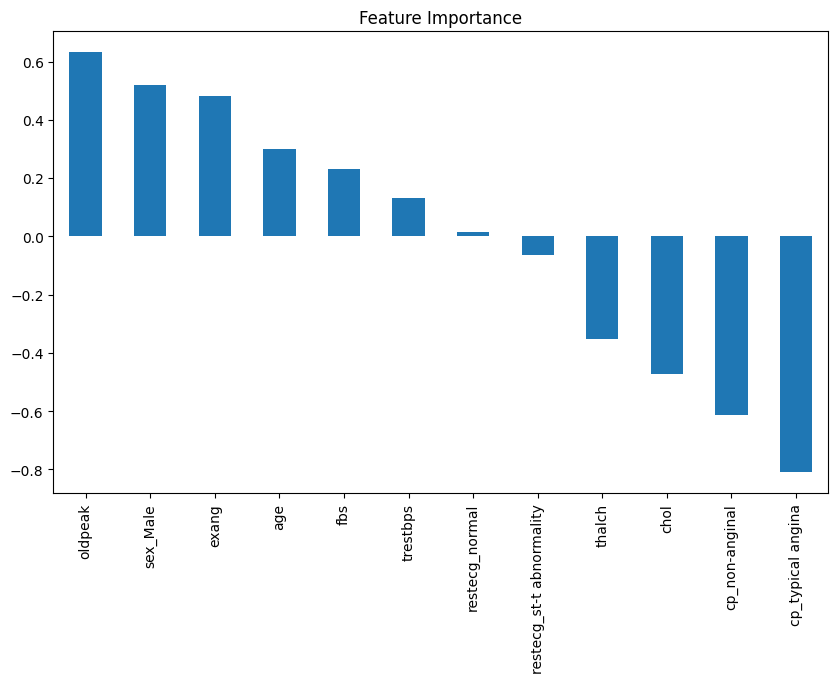

In [88]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot
feature_importance.plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


# Cell 16: Training a Decision Tree Classifier

Creates a Decision Tree Classifier with random_state=42 for reproducibility.

Trains the model on the training dataset (X_train, y_train).

In [89]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Cell 17: Decision Tree Predictions and Evaluation

Predicts classes on the test set using the trained Decision Tree (y_pred_dt).

Predicts probabilities for the ROC curve (y_pred_prob_dt).

Computes accuracy and prints it.

Displays a confusion matrix using a heatmap.

Prints a classification report (precision, recall, F1-score).


Decision Tree Accuracy: 0.70


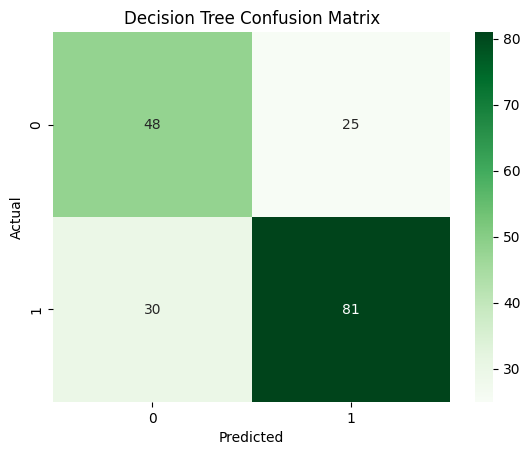

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64        73
           1       0.76      0.73      0.75       111

    accuracy                           0.70       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.71      0.70      0.70       184



In [90]:
# Predict classes
y_pred_dt = dt_model.predict(X_test)

# Predict probabilities for ROC curve
y_pred_prob_dt = dt_model.predict_proba(X_test)[:,1]

# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Classification Report
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


# Cell 18: Decision Tree ROC Curve

1. Computes FPR (False Positive Rate), TPR (True Positive Rate), and thresholds for the Decision Tree predictions.

2. Calculates the AUC score (auc_dt) to measure overall model performance.

3. Plots the ROC curve:

   Curve above the diagonal → better than random

   Dashed line → baseline (random classifier)
 
Outcome:

  ROC curve plot for the Decision Tree
  AUC = 0.69 → moderate ability to distinguish between patients with and without heart disease.

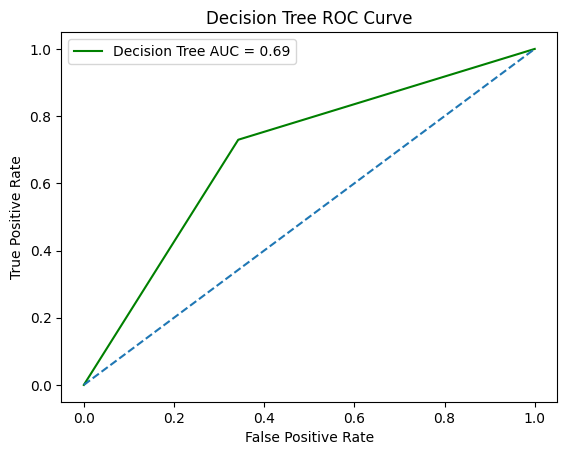

In [91]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree AUC = {auc_dt:.2f}", color='green')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()


# Cell 19 : Decision Tree Feature Importance

1. Extracts the feature importances from the trained Decision Tree (dt_model.feature_importances_).

2. Creates a pandas Series and sorts it to show the most important features first.

3. Plots a bar chart to visualize which features have the greatest impact on predicting heart disease.

Outcome:
    Printed sorted feature importance.
    Bar chart highlighting the top predictors.

Decision Tree Feature Importance:
 chol                        0.190401
exang                       0.189531
thalch                      0.150008
age                         0.128068
oldpeak                     0.114196
trestbps                    0.080799
sex_Male                    0.039268
cp_non-anginal              0.031991
cp_typical angina           0.030950
restecg_normal              0.025608
restecg_st-t abnormality    0.010707
fbs                         0.008473
dtype: float64


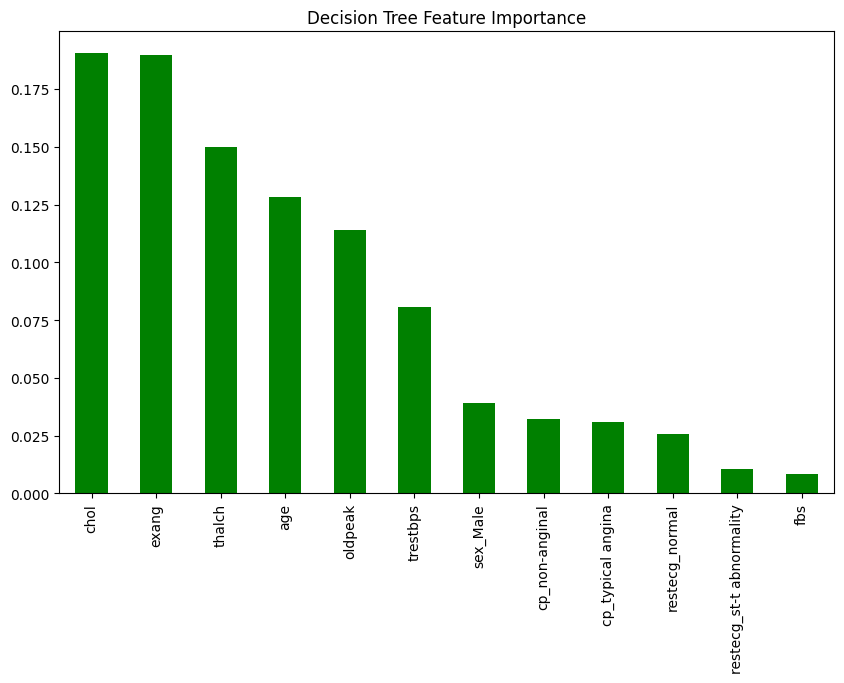

In [92]:
# Feature Importance
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance_dt)

# Plot
feature_importance_dt.plot(kind='bar', figsize=(10,6), color='green')
plt.title("Decision Tree Feature Importance")
plt.show()


# Cell 20: Model Comparison
1. Creates a DataFrame to compare Logistic Regression and Decision Tree models.

2. Includes Accuracy and AUC for each model.

3. Prints the comparison for quick evaluation of performance.

outcome
    
   Accuracy: shows overall correctness of predictions.

   AUC: shows ability to distinguish between patients with and without heart disease.

   Logistic Regression has higher AUC → better at ranking patients by risk.

   Decision Tree may still be useful but has lower discriminative power.

In [93]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'], 
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_dt)],
    'AUC': [roc_auc_score(y_test, y_pred_prob), roc_auc_score(y_test, y_pred_prob_dt)] }) 
print(comparison)

                 Model  Accuracy       AUC
0  Logistic Regression  0.804348  0.865976
1        Decision Tree  0.701087  0.693632


# Final Insights – Heart Disease Prediction

Logistic Regression outperforms Decision Tree with Accuracy = 0.80 and AUC = 0.87, showing better ability to distinguish patients at risk.

Decision Tree has moderate performance (Accuracy = 0.70, AUC = 0.69) and captures some patterns but is less reliable.

Key features influencing prediction: maximum heart rate (thalch), chest pain type (cp/cp_3), and exercise-induced angina (exang).

Logistic Regression provides more reliable predictions, while feature importance highlights the major medical risk factors.